<a href="https://colab.research.google.com/github/Nazhan99/Tensorflow_notes/blob/main/10_time_series_forecasting_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting fundamentals with tensorflow + milestone project 3: BitPredict

let's write some tensorflow code to predict the price of Bitcoin based on the historical price of Bitcoin

## Get data
bitcoin data can be download at https://www.coindesk.com/price/bitcoin/

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-04-19 04:14:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2022-04-19 04:14:43 (7.71 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [2]:
#import pandas
import pandas as pd

#let's read in our bitcoin ata and parse the dates
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) #parse the date column and tell pandas the column1 is a datetime
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# how many samples do we have?
len(df)

2787

we have collected the historical price of Bitcoin for the past of 8 years but there us 2787 samples.

Typically deep learning models usually like lots and lots of samples where lots and lots can thousands to tens of thousand to millions.

A smaller number of samples is something you will often run into with time series data problems.

**Note:** the seasonality of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning we will get 365 samples per year.

In [5]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [6]:
#only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


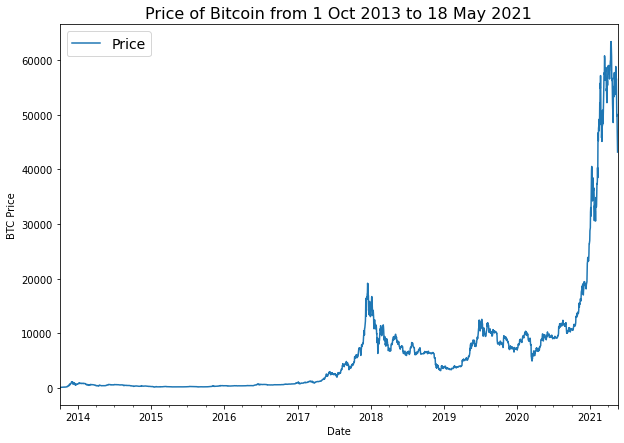

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

## Importing time series data with Python's CSV module

In [8]:
#Importing and formatting historical Bitcoin data with python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f,delimiter=",")
  next(csv_reader) #skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) #get the dates as dates (not string)
    btc_price.append(float(line[2])) #get the closing price as float

#view first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

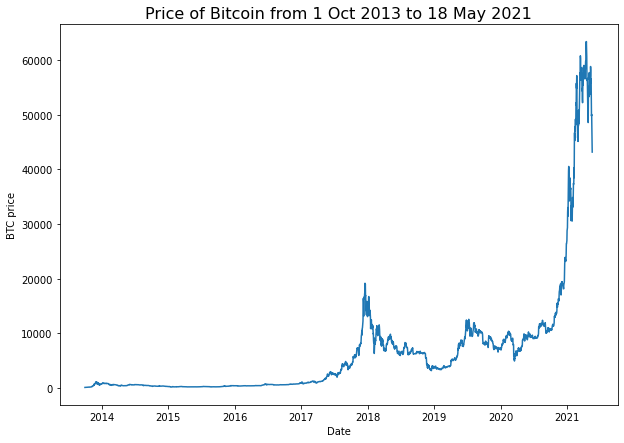

In [9]:
#plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC price")
plt.xlabel("Date")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize = 16);

## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data (wrong way)

In [10]:
#get bitcoing date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
#wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, #dates
                                                   prices, #BTC prices
                                                   test_size=0.2,
                                                   random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

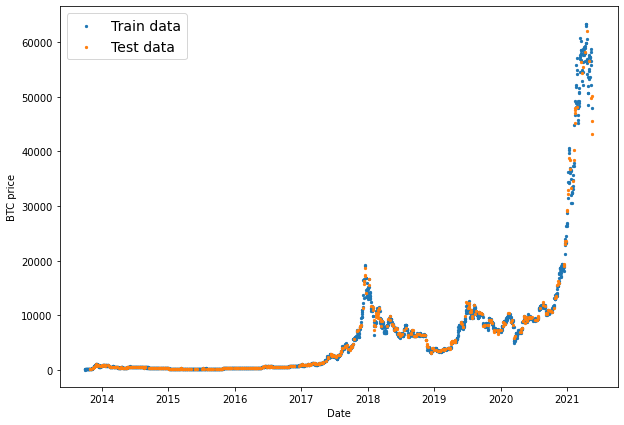

In [12]:
#Let's plot wrong train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.legend(fontsize=14)
plt.ylabel("BTC price")
plt.xlabel("Date")
plt.show();

### Create train & test sets for time series (right way)

In [13]:
# create train and test splits the right way for time series data 
split_size = int(0.8 * len(prices)) # 80% train, 20% test

#create train data splits (Everythings before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

#create test data splits (everythings beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

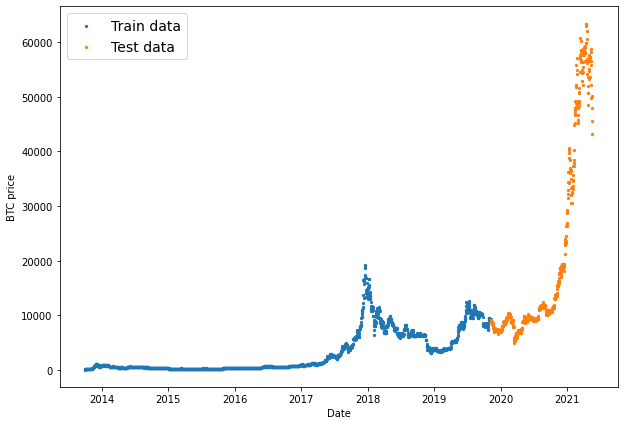

In [14]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.legend(fontsize=14)
plt.ylabel("BTC price")
plt.xlabel("Date")
plt.show();

### Create a plotting function

typing plotting code is tedious, let's functionize it

In [15]:
#create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values

  Parameters
  -------------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values
  """
  #plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) #make label bigger
  plt.grid(True)




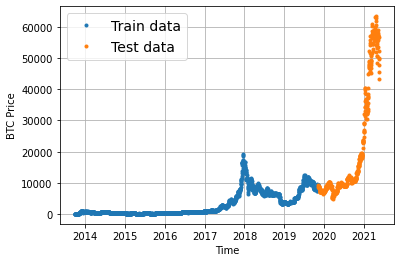

In [16]:
#test our plotting function
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

we got somme Bitcoin historical data to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:
* **Horizon** = number of timesteps into the future we are going to predict
* **Window size** = number of timesteps we are going to use to predict **horizon**

Modelling experiments we are running:
* 0 naive model (baseline) NA NA NA
* 1 Dense mode, horizon =1, window =7
* 2 Same as 1, horizon = 1, window =  30 
* 3 Same as 1, horizon = 7, window = 30
* 4 Conv1D 1 7 NA
* 5 LSTM 1 7 NA
* 6 Same as 1 (but with multivariate data) 1 7 Block reward test_size* 7 N-BEATs Algorithm 1 7 NA
* 8 Ensemble (multiple models optimized on different loss functions) 1 7 NA
* 9 Future prediction model (model to predict future values)
* 10 Same as 1 (but with turkey data introduced) 1 7 NA

## Model 0: Naive forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In english:

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep)-this is for horizon

In [17]:
# create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [18]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

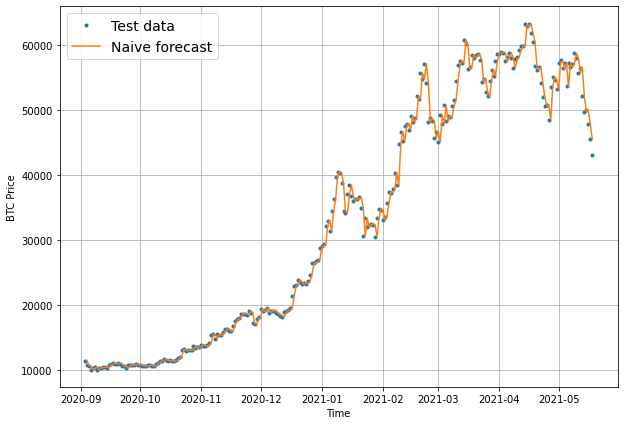

In [19]:
#plot naive forecast
plt.figure(figsize=(10,7))
#plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=300, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast,format="-", start=300, label="Naive forecast")

## Evaluating a time series model

Let's look into some evaluating metrics for time series forecasting.

What are we doing?

We are predicting a number, so that means we have a form of a regression problem.

Because we are working on a regression problem, we will need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecast):
* MAE - mean absolute error
* MSE - mean squared error

For all of above metrics, the lower is the better. for example, an MAE of 0 is better than an MAE of 100.

The main thing we are evalauting here is: how do our model's forecast (y_pred) compare against the actual values (y_true or groun_truth values)?

refence: https://otexts.com/fpp2/

In [20]:
import tensorflow as tf

In [21]:
#MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae=tf.reduce_mean(tf.abs(y_true-y_pred))

  #find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_pred[:-1])) #our seasonality is 1 day (hence the shift of 1)
  
  return mae/mae_naive_no_season

In [22]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.6921240375097498

In [23]:
#create a function to take in model prediction and truth value and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  #make sure float32 datatype (for metric calculations)
  y_true= tf.cast(y_true, dtype= tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  #calculate various evaluation metrics
  mae= tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape= tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [24]:
naive_results = evaluate_preds(y_true = y_test[1:],
                               y_pred = naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.69212395,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [25]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [26]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [27]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Other models you can use for baselines and for actual forecast

there are plenty other style of time series forecasting models you may want to experiment with:
https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

## Format Data Part 2: Windowing our dataset

we window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [28]:
y_train

array([ 123.65499   ,  125.455     ,  108.58483   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

In [29]:
# what we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [30]:
# let's setup global variables for window and horizon size
HORIZON = 1 #predict next 1 day
WINDOW_SIZE= 7 # use the past week of bitcoin data to make the prediction

In [31]:
#create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  creates labels for windowed dataset.

  E.g if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6, 7], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [32]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


we have got a way to label our windowed data.

However, this only works on a small scale.

 we need a way to o the above across our entire time series

 we could do this with python for loops, however, for large time series, that would be quite slow.

 to speed things up, we will leverage NumPy's array indexing.

 https://numpy.org/doc/stable/reference/arrays.indexing.html

 Our function will:
 1. Create a window step of specific window size (e.gg. [0, 1, 2, 3, 4, 5, 6])
 2. Use NumPy indexing to create a 2D array of multiple window steps, for example:

```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```

3. Uses the 2D array of multiple window steps (from 2) to indx on a target series (e.g the historical price of Bitcoin)
4. Uses our get_labelled_windows() function we created above to turn the window steps into windows with specific horizon.

reference: https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5?gi=abd58221e921

In [33]:
import numpy as np

In [34]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [35]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [36]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")


Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [37]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


There is a function  which does similar to the above in tf.keras.utils an extension could be to try and replicate what we have done using the premade function:
https://tensorflow.google.cn/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

## Turning windows into training and test sets

In [38]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [39]:
# create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [40]:
#check to see if train label are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint
Because our model's performance will fluctuate from experiment to experiment, we are going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example if our model performs the best on epoch 55 (buit we are trainign for 100 epochs), we want to load and evalaute the model saved on epoch 55.

we can create  a modelling checkpoint using the following: 
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [41]:
import os

# create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0, #only output a limited amount of text
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimization and MAE loss function
* Batch size of 128 (previously we have used 32)
* 100 epochs 

Why these values?

I picked them out of experimentation.

* *Hyperparameters* = values a machine learning practitioner can adjust themselves
* *Parameters* = values a model learns on its own

In [42]:
import tensorflow as tf
from tensorflow.keras import layers

#set random seed
tf.random.set_seed(42)

# 1. Cconstruct model
model_1 = tf.keras.Sequential([
                               layers.Dense(128,activation="relu"),
                               layers.Dense(HORIZON, activation="linear") #linear activation = no activation
], name="model_1_dense")

# 2.compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 7s 147ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6526 - val_mae: 2279.6526 - val_mse: 12772728.0000
Epoch 2/100
18/18 [==============================] - 1s 86ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9991 - val_mae: 1005.9991 - val_mse: 3441833.5000
Epoch 3/100
18/18 [==============================] - 1s 83ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.5625 - val_loss: 923.2862 - val_mae: 923.2862 - val_mse: 2868220.5000
Epoch 4/100
18/18 [==============================] - 1s 85ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5625 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.2500
Epoch 5/100
18/18 [==============================] - 1s 76ms/step - loss: 165.0895 - mae: 165.0895 - mse: 145490.7969 - val_loss: 895.2238 - val_mae: 895.2238 - val_mse: 2564574.0000
Epoch 6/100
18/18 [==============================] - 1s 63ms/step - loss: 158.

In [43]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.69212395,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [44]:
#Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 585.9762 - mae: 585.9762 - mse: 1197803.1250


[585.9761962890625, 585.9761962890625, 1197803.125]

In [45]:
#Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 568.9512 - mae: 568.9512 - mse: 1171744.0000


[568.951171875, 568.951171875, 1171744.0]

## Making forecast with a model (on the test dataset)

To make "forecast" on  the test dataset (note: these won't be actual forecasts, they are only pseudo forecasts because actual forecasts are into the future), let's write a function to:

1. Take in a train mooedl
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's predict() method
4. Return the predictions

In [46]:
def make_preds(model, input_data):
  """
  Uses model to make prediction input_data.
  """
  forecast=model.predict(input_data)
  return tf.squeeze(forecast) #return 1D array of predictions

In [47]:
# Make prediction using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.711, 8769.886, 9015.71 , 8795.517, 8723.809, 8730.11 ,
        8691.95 , 8502.054, 8460.961, 8516.547], dtype=float32)>)

In [48]:
#Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)

model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.688677,
 'mse': 1171744.0,
 'rmse': 1082.4713}

In [49]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.69212395,
 'mse': 1147547.0,
 'rmse': 1071.2362}

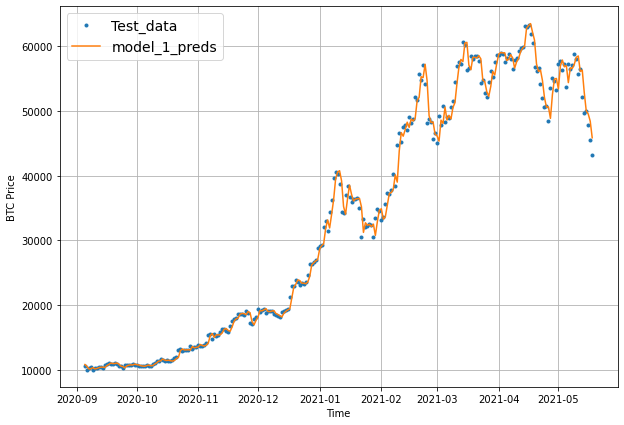

In [50]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

##Model 2: Dense (window =30, horizon = 1)

In [51]:
HORIZON = 1 #predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 #use 30 timesteps in past

In [52]:
# make window data with appropriate horizon adn window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [53]:
# make train  and testing window
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [54]:
tf.random.set_seed(42)

# create model 2
model_2 = tf.keras.Sequential([
                               layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON)
], name="model_2_dense")

#compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

#fit 
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [55]:
#Evaluate model 2 on test data
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 608.9615


608.9614868164062

In [56]:
#Load in the best performing model
model_2=tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 608.9615


608.9614868164062

In [57]:
#get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [58]:
model_2_preds.shape

TensorShape([552])

In [59]:
#Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred= model_2_preds)
model_2_results

{'mae': 608.9615,
 'mape': 2.7693388,
 'mase': 0.71157324,
 'mse': 1281438.9,
 'rmse': 1132.0066}

In [60]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.69212395,
 'mse': 1147547.0,
 'rmse': 1071.2362}

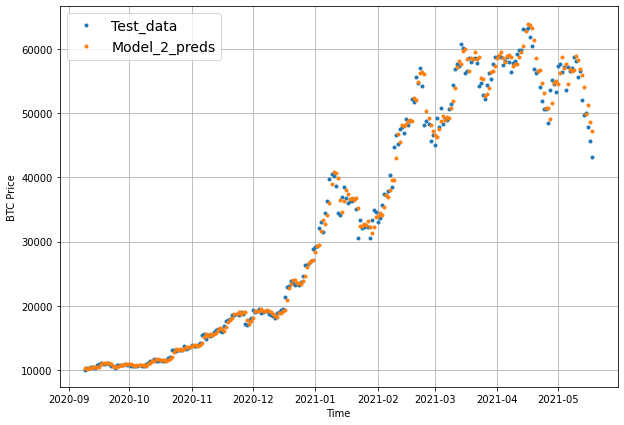

In [61]:
offset=300
plt.figure(figsize=(10,7))

#Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, label="Model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)

In [62]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [63]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [64]:
tf.random.set_seed(42)

#create model (same as model 1 with different data input and output sizes)
model_3=tf.keras.Sequential([
                             layers.Dense(128, activation="relu"),
                             layers.Dense(HORIZON)
], name="model_3_dense")

# compile
model_3.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

#fit
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
18/18 [==============================] - 1s 43ms/step - loss: 1476.6752 - val_loss: 3088.5618
Epoch 2/100
18/18 [==============================] - 1s 48ms/step - loss: 552.8943 - val_loss: 2462.4548
Epoch 3/100
18/18 [==============================] - 1s 37ms/step - loss: 435.1979 - val_loss: 2283.1482
Epoch 4/100
18/18 [==============================] - 1s 40ms/step - loss: 391.9787 - val_loss: 1975.1218
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 357.9485 - val_loss: 2000.1554
Epoch 6/100
18/18 [==============================] - 1s 37ms/step - loss: 332.6705 - val_loss: 1723.4183
Epoch 7/100
18/18 [==============================] - 1s 35ms/step - loss: 309.9903 - val_loss: 1591.9685
Epoch 8/100
18/18 [==============================] - 1s 35ms/step - loss: 302.4122 - val_loss: 1579.8518
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 293.9170 - val_loss: 1602.9115
Epoch 10/100
18/18 [==============================] - 1s

In [65]:
#Evaluate the model on test data
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1321.5201


1321.5201416015625

In [66]:
#loadd best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1237.5063


1237.50634765625

In [67]:
# make prediction with model 3
model_3_preds=make_preds(model_3, 
                        input_data=test_windows)

model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9004.693 , 9048.1   , 9425.088 , 9258.258 , 9495.798 , 9558.451 ,
        9357.354 ],
       [8735.507 , 8840.304 , 9247.793 , 8885.6   , 9097.188 , 9174.328 ,
        9156.819 ],
       [8672.508 , 8782.388 , 9123.8545, 8770.37  , 9007.13  , 9003.87  ,
        9042.723 ],
       [8874.398 , 8784.737 , 9043.901 , 8943.051 , 9033.479 , 9176.488 ,
        9039.676 ],
       [8825.891 , 8777.4375, 8926.779 , 8870.178 , 9213.232 , 9268.156 ,
        8942.485 ]], dtype=float32)>

In [68]:
model_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8946.987, 8967.846, 8820.251, 8615.828, 8485.796], dtype=float32)>

In [69]:
model_3_preds.shape, model_2_preds.shape

(TensorShape([551, 7]), TensorShape([552]))

In [70]:
#evaluate model_3 results
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)

##Make our evaluation function work for larger horizons

In [71]:
#create a function to take in model prediction and truth value and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  #make sure float32 datatype (for metric calculations)
  y_true= tf.cast(y_true, dtype= tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  #calculate various evaluation metrics
  mae= tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape= tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  #Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae=tf.reduce_mean(mae)
    mse=tf.reduce_mean(mse)
    rmse=tf.reduce_mean(rmse)
    mape=tf.reduce_mean(mape)
    mase=tf.reduce_mean(mase)


  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [72]:
#get model_3 results aggregated to single value
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1237.5063,
 'mape': 5.5588784,
 'mase': 0.88004005,
 'mse': 5405198.5,
 'rmse': 1425.7479}

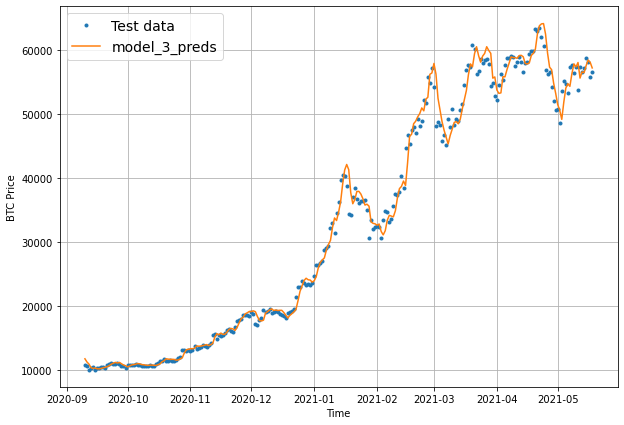

In [73]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0], start=offset, label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds,axis=1), start=offset, format="-", label="model_3_preds")

## which of our model is performing the best so far?

so we have trained a few models, let's compare them 

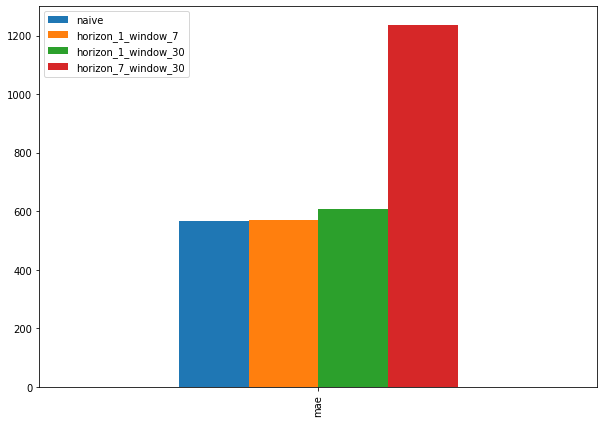

In [74]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30":model_2_results["mae"],
              "horizon_7_window_30":model_3_results["mae"]}, index=["mae"]).plot(figsize=(10,7), kind="bar");

## Model 4: Conv1D

In [75]:
HORIZON = 1 #predict next day of Bitcoin prices
WINDOW_SIZE= 7 #use previous  week worth data

In [76]:
#create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [77]:
#create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [78]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels) 

(2224, 556, 2224, 556)

To use the Conv1D layer, we need an input shape of: `(batch_size, timesteps, input_dims)`...
However, our data isn't in that shape yet..

In [79]:
#check data input shape
train_windows[0].shape #returns (WINDOW_SIZE, )

(7,)

In [80]:
# Before we pass our data to Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [81]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) #add an extra dimension for "input_dims"|

In [82]:
#test out our lambda layer
print(f"Original shape: {x.shape}") #(WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}")#output = ...?
print(f"Origiinal value with expanded shape: \n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Origiinal value with expanded shape: 
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [83]:
tf.random.set_seed(42)

#create Conv1D model
model_4=tf.keras.Sequential([
                             layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
                             layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
                             layers.Dense(HORIZON)
], name="model_4_conv1D")

#ccompile
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
18/18 [==============================] - 10s 65ms/step - loss: 1207.3817 - val_loss: 2320.6218
Epoch 2/100
18/18 [==============================] - 1s 48ms/step - loss: 316.2171 - val_loss: 1467.2800
Epoch 3/100
18/18 [==============================] - 1s 48ms/step - loss: 192.6853 - val_loss: 1164.7075
Epoch 4/100
18/18 [==============================] - 1s 47ms/step - loss: 177.3535 - val_loss: 981.6695
Epoch 5/100
18/18 [==============================] - 1s 47ms/step - loss: 172.3467 - val_loss: 960.8708
Epoch 6/100
18/18 [==============================] - 1s 61ms/step - loss: 171.9754 - val_loss: 950.2026
Epoch 7/100
18/18 [==============================] - 1s 48ms/step - loss: 167.1943 - val_loss: 943.2872
Epoch 8/100
18/18 [==============================] - 1s 47ms/step - loss: 163.5991 - val_loss: 905.5262
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 162.5455 - val_loss: 929.7608
Epoch 10/100
18/18 [==============================] - 1s 48m

In [84]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [85]:
#evaluate model
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 610.1537


610.1537475585938

In [86]:
#load back in best performing Conv1D model
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 570.8284


570.828369140625

In [87]:
# make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8851.465, 8754.471, 8983.928, 8759.671, 8703.627], dtype=float32)>

In [88]:
# evaluate predictions
model_4_results = evaluate_preds(y_true= tf.squeeze(test_labels),
                                 y_pred= model_4_preds)
model_4_results

{'mae': 570.82837,
 'mape': 2.5593357,
 'mase': 0.6836176,
 'mse': 1176671.2,
 'rmse': 1084.7448}

## Model 5: RNN (LSTM)

In [89]:
tf.random.set_seed(42)

#let's build an LSTM model with the functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
#x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5= tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

#compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

#fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 2405.3933INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 4s 153ms/step - loss: 2323.6082 - val_loss: 9222.6523
Epoch 2/100
16/18 [=========================>....] - ETA: 0s - loss: 741.1183 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 154ms/step - loss: 695.4739 - val_loss: 1486.0555
Epoch 3/100
14/18 [======================>.......] - ETA: 0s - loss: 251.0760INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 137ms/step - loss: 237.3967 - val_loss: 1298.9084
Epoch 4/100
15/18 [========================>.....] - ETA: 0s - loss: 182.5865INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 139ms/step - loss: 181.9180 - val_loss: 966.6430
Epoch 5/100
18/18 [==============================] - 0s 9ms/step - loss: 173.4022 - val_loss: 970.9295
Epoch 6/100
16/18 [=========================>....] - ETA: 0s - loss: 172.5681INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 140ms/step - loss: 173.5414 - val_loss: 941.4746
Epoch 7/100
15/18 [========================>.....] - ETA: 0s - loss: 176.5974INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 156ms/step - loss: 170.3566 - val_loss: 898.5215
Epoch 8/100
18/18 [==============================] - 0s 10ms/step - loss: 157.6712 - val_loss: 914.8641
Epoch 9/100
18/18 [==============================] - 0s 10ms/step - loss: 166.5143 - val_loss: 1079.0775
Epoch 10/100
15/18 [========================>.....] - ETA: 0s - loss: 158.8814INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 137ms/step - loss: 162.3369 - val_loss: 877.1689
Epoch 11/100
18/18 [==============================] - 0s 9ms/step - loss: 163.0841 - val_loss: 924.1126
Epoch 12/100
18/18 [==============================] - 0s 10ms/step - loss: 168.5598 - val_loss: 941.6025
Epoch 13/100
18/18 [==============================] - 0s 10ms/step - loss: 166.4727 - val_loss: 934.8435
Epoch 14/100
18/18 [==============================] - 0s 10ms/step - loss: 163.9537 - val_loss: 920.2159
Epoch 15/100
15/18 [========================>.....] - ETA: 0s - loss: 155.2641INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 139ms/step - loss: 152.9470 - val_loss: 856.2653
Epoch 16/100
18/18 [==============================] - 0s 11ms/step - loss: 147.4420 - val_loss: 898.9912
Epoch 17/100
18/18 [==============================] - 0s 10ms/step - loss: 151.0533 - val_loss: 943.1415
Epoch 18/100
18/18 [==============================] - 0s 10ms/step - loss: 157.8232 - val_loss: 924.0045
Epoch 19/100
18/18 [==============================] - 0s 11ms/step - loss: 155.9198 - val_loss: 911.4751
Epoch 20/100
18/18 [==============================] - 0s 11ms/step - loss: 155.6456 - val_loss: 862.6679
Epoch 21/100
18/18 [==============================] - 0s 12ms/step - loss: 153.1514 - val_loss: 862.5831
Epoch 22/100
18/18 [==============================] - 0s 10ms/step - loss: 151.4883 - val_loss: 863.8171
Epoch 23/100
18/18 [==============================] - 0s 10ms/step - loss: 150.7770 - val_loss: 886.8352
Epoch 24/100
18/18 [==============================] - 0s 10ms/step 

INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 166ms/step - loss: 146.8467 - val_loss: 845.2780
Epoch 26/100
12/18 [===================>..........] - ETA: 0s - loss: 146.2229INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 143ms/step - loss: 145.9843 - val_loss: 818.6807
Epoch 27/100
17/18 [===========================>..] - ETA: 0s - loss: 143.6015INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 137ms/step - loss: 144.4289 - val_loss: 804.3278
Epoch 28/100
15/18 [========================>.....] - ETA: 0s - loss: 139.9896INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 137ms/step - loss: 142.4610 - val_loss: 789.0858
Epoch 29/100
18/18 [==============================] - 0s 10ms/step - loss: 141.8738 - val_loss: 806.6756
Epoch 30/100
18/18 [==============================] - 0s 11ms/step - loss: 142.0521 - val_loss: 794.8835
Epoch 31/100
15/18 [========================>.....] - ETA: 0s - loss: 136.6255INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 5s 305ms/step - loss: 138.4690 - val_loss: 773.2811
Epoch 32/100
18/18 [==============================] - ETA: 0s - loss: 137.1986INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 6s 371ms/step - loss: 137.1986 - val_loss: 772.2625
Epoch 33/100
18/18 [==============================] - 0s 19ms/step - loss: 135.9342 - val_loss: 786.4801
Epoch 34/100
17/18 [===========================>..] - ETA: 0s - loss: 135.5343INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 6s 323ms/step - loss: 136.1931 - val_loss: 744.4506
Epoch 35/100
18/18 [==============================] - 0s 21ms/step - loss: 133.4514 - val_loss: 756.2968
Epoch 36/100
17/18 [===========================>..] - ETA: 0s - loss: 133.3408INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 5s 291ms/step - loss: 134.0992 - val_loss: 735.1729
Epoch 37/100
18/18 [==============================] - 0s 11ms/step - loss: 130.6932 - val_loss: 745.9096
Epoch 38/100
16/18 [=========================>....] - ETA: 0s - loss: 129.8099INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 139ms/step - loss: 129.2891 - val_loss: 717.2498
Epoch 39/100
18/18 [==============================] - 0s 10ms/step - loss: 129.6088 - val_loss: 719.0669
Epoch 40/100
18/18 [==============================] - 0s 10ms/step - loss: 129.6111 - val_loss: 732.0630
Epoch 41/100
15/18 [========================>.....] - ETA: 0s - loss: 131.4351INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 142ms/step - loss: 127.1393 - val_loss: 702.9354
Epoch 42/100
15/18 [========================>.....] - ETA: 0s - loss: 123.2224INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 138ms/step - loss: 125.6113 - val_loss: 700.8699
Epoch 43/100
18/18 [==============================] - 0s 9ms/step - loss: 125.9959 - val_loss: 704.3680
Epoch 44/100
18/18 [==============================] - 0s 10ms/step - loss: 125.2330 - val_loss: 719.1411
Epoch 45/100
14/18 [======================>.......] - ETA: 0s - loss: 125.4368INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 163ms/step - loss: 129.0878 - val_loss: 687.3796
Epoch 46/100
18/18 [==============================] - 0s 10ms/step - loss: 124.9461 - val_loss: 706.3905
Epoch 47/100
14/18 [======================>.......] - ETA: 0s - loss: 118.3403INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 143ms/step - loss: 126.0465 - val_loss: 678.0845
Epoch 48/100
15/18 [========================>.....] - ETA: 0s - loss: 124.6099INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 146ms/step - loss: 123.9412 - val_loss: 677.1480
Epoch 49/100
18/18 [==============================] - 0s 10ms/step - loss: 123.1814 - val_loss: 700.9755
Epoch 50/100
18/18 [==============================] - 0s 10ms/step - loss: 125.1446 - val_loss: 725.7572
Epoch 51/100
18/18 [==============================] - 0s 11ms/step - loss: 125.5208 - val_loss: 780.1040
Epoch 52/100
15/18 [========================>.....] - ETA: 0s - loss: 128.1749INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 139ms/step - loss: 123.5061 - val_loss: 663.2543
Epoch 53/100
18/18 [==============================] - 0s 10ms/step - loss: 120.0524 - val_loss: 665.6277
Epoch 54/100
14/18 [======================>.......] - ETA: 0s - loss: 123.2496INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 165ms/step - loss: 120.4394 - val_loss: 658.1812
Epoch 55/100
15/18 [========================>.....] - ETA: 0s - loss: 122.3055INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 141ms/step - loss: 118.6817 - val_loss: 650.8017
Epoch 56/100
16/18 [=========================>....] - ETA: 0s - loss: 120.7393INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 141ms/step - loss: 120.2385 - val_loss: 646.9162
Epoch 57/100
18/18 [==============================] - 0s 10ms/step - loss: 123.6108 - val_loss: 676.0363
Epoch 58/100
16/18 [=========================>....] - ETA: 0s - loss: 118.5885INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 157ms/step - loss: 118.2166 - val_loss: 642.8526
Epoch 59/100
18/18 [==============================] - 0s 10ms/step - loss: 117.8050 - val_loss: 644.1140
Epoch 60/100
15/18 [========================>.....] - ETA: 0s - loss: 119.4779INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 140ms/step - loss: 118.0277 - val_loss: 640.6298
Epoch 61/100
18/18 [==============================] - 0s 10ms/step - loss: 117.6757 - val_loss: 674.2546
Epoch 62/100
18/18 [==============================] - 0s 9ms/step - loss: 120.8419 - val_loss: 736.8734
Epoch 63/100
18/18 [==============================] - 0s 11ms/step - loss: 122.4814 - val_loss: 641.0597
Epoch 64/100
18/18 [==============================] - 0s 10ms/step - loss: 115.6879 - val_loss: 665.2364
Epoch 65/100
15/18 [========================>.....] - ETA: 0s - loss: 116.3443INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 137ms/step - loss: 117.8764 - val_loss: 629.4848
Epoch 66/100
15/18 [========================>.....] - ETA: 0s - loss: 116.7006INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 139ms/step - loss: 115.7342 - val_loss: 627.8654
Epoch 67/100
14/18 [======================>.......] - ETA: 0s - loss: 117.9635INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 159ms/step - loss: 116.0720 - val_loss: 624.9843
Epoch 68/100
18/18 [==============================] - 0s 10ms/step - loss: 115.8544 - val_loss: 626.7468
Epoch 69/100
13/18 [====================>.........] - ETA: 0s - loss: 118.0726INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 139ms/step - loss: 119.5743 - val_loss: 623.6360
Epoch 70/100
14/18 [======================>.......] - ETA: 0s - loss: 114.9553INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 140ms/step - loss: 115.2881 - val_loss: 623.5431
Epoch 71/100
18/18 [==============================] - 0s 10ms/step - loss: 114.6981 - val_loss: 640.9242
Epoch 72/100
15/18 [========================>.....] - ETA: 0s - loss: 116.1623INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 136ms/step - loss: 117.3488 - val_loss: 621.0178
Epoch 73/100
18/18 [==============================] - 0s 10ms/step - loss: 114.7942 - val_loss: 629.5701
Epoch 74/100
18/18 [==============================] - 0s 10ms/step - loss: 115.1500 - val_loss: 626.9415
Epoch 75/100
18/18 [==============================] - 0s 9ms/step - loss: 115.9312 - val_loss: 662.2502
Epoch 76/100
16/18 [=========================>....] - ETA: 0s - loss: 116.0691INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 160ms/step - loss: 115.1412 - val_loss: 620.8359
Epoch 77/100
18/18 [==============================] - 0s 9ms/step - loss: 117.6456 - val_loss: 668.2390
Epoch 78/100
18/18 [==============================] - 0s 10ms/step - loss: 117.0707 - val_loss: 628.1731
Epoch 79/100
15/18 [========================>.....] - ETA: 0s - loss: 113.1239INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 140ms/step - loss: 113.6489 - val_loss: 610.1957
Epoch 80/100
18/18 [==============================] - 0s 9ms/step - loss: 113.0044 - val_loss: 624.5187
Epoch 81/100
18/18 [==============================] - 0s 10ms/step - loss: 113.2803 - val_loss: 632.4530
Epoch 82/100
15/18 [========================>.....] - ETA: 0s - loss: 116.7091INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 139ms/step - loss: 115.9831 - val_loss: 607.7241
Epoch 83/100
18/18 [==============================] - 0s 9ms/step - loss: 113.7448 - val_loss: 622.1393
Epoch 84/100
18/18 [==============================] - 0s 10ms/step - loss: 114.0071 - val_loss: 619.6950
Epoch 85/100
18/18 [==============================] - 0s 10ms/step - loss: 114.1199 - val_loss: 640.6756
Epoch 86/100
18/18 [==============================] - 0s 11ms/step - loss: 115.0656 - val_loss: 613.5978
Epoch 87/100
18/18 [==============================] - 0s 10ms/step - loss: 112.2010 - val_loss: 607.8956
Epoch 88/100
15/18 [========================>.....] - ETA: 0s - loss: 115.9324INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 158ms/step - loss: 112.1981 - val_loss: 601.7839
Epoch 89/100
18/18 [==============================] - 0s 10ms/step - loss: 112.8817 - val_loss: 647.1225
Epoch 90/100
18/18 [==============================] - 0s 10ms/step - loss: 118.4780 - val_loss: 660.7481
Epoch 91/100
18/18 [==============================] - 0s 9ms/step - loss: 118.6482 - val_loss: 685.7650
Epoch 92/100
18/18 [==============================] - 0s 10ms/step - loss: 114.3789 - val_loss: 622.2435
Epoch 93/100
15/18 [========================>.....] - ETA: 0s - loss: 116.6698INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 139ms/step - loss: 113.3837 - val_loss: 599.4068
Epoch 94/100
18/18 [==============================] - 0s 10ms/step - loss: 111.0267 - val_loss: 600.6318
Epoch 95/100
14/18 [======================>.......] - ETA: 0s - loss: 112.4520INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 140ms/step - loss: 111.1373 - val_loss: 597.5020
Epoch 96/100
18/18 [==============================] - 0s 10ms/step - loss: 111.1646 - val_loss: 603.2917
Epoch 97/100
18/18 [==============================] - 0s 11ms/step - loss: 111.7010 - val_loss: 618.8985
Epoch 98/100
18/18 [==============================] - 0s 9ms/step - loss: 111.8481 - val_loss: 598.4055
Epoch 99/100
15/18 [========================>.....] - ETA: 0s - loss: 110.2049INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 139ms/step - loss: 110.7292 - val_loss: 596.6447
Epoch 100/100
18/18 [==============================] - 0s 9ms/step - loss: 112.5656 - val_loss: 597.1186


In [90]:
#load in best version of model 5 and evaluate on the test data
model_5= tf.keras.models.load_model("model_experiments/model_5_LSTM/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 596.6447


596.6446533203125

In [91]:
#make prediction with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8991.225, 8823.2  , 9009.359, 8847.859, 8742.254], dtype=float32)>

In [92]:
#evaluate model 5 preds
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred= model_5_preds)
model_5_results

{'mae': 596.64465,
 'mape': 2.6838453,
 'mase': 0.70465666,
 'mse': 1273486.9,
 'rmse': 1128.4888}

In [93]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.688677,
 'mse': 1171744.0,
 'rmse': 1082.4713}

## Make multivariate time series dataset

Before we add a feature to our time series, what is a feature we can use?

One feature we could add is whether or not there is a twitter on that day...
* day 1-0
* day 2-1
* day 3-0

what is a better feature to use?

how about the bitcoin halving event?


In [94]:
# let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [95]:
#let's add bitcoin halving event to our data
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset( our data start from 01 october 2010)
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

#block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [96]:
# create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [97]:
#add in block reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1]= block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1]= block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1]= block_reward_4

In [98]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


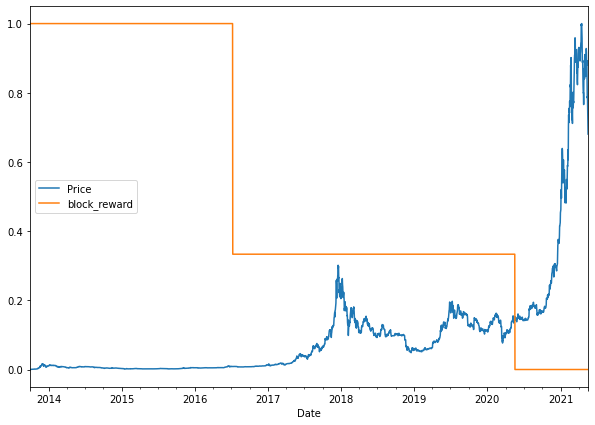

In [99]:
#plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price","block_reward"]]),
                                                  columns=bitcoin_prices_block.columns,
                                                  index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10,7))

## Making a windowed dataset with pandas

Previously, we have turned our univariate time series into windowed dataset using the helper functions above.

However, since we have got multivariate data, these functions won't work

We can use the pandas.FataFrame.shift() method to window our multivariate data.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html?highlight=shift#pandas.DataFrame.shift

In [100]:
#setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [101]:
#make a copy of the bitcoin  historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we have done is created a way to window our dataset directly from a pandas fataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [102]:
#craete X (windows) and y(horizon) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [103]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [104]:
#make train and test sets using indexing
split_size = int(len(X) *0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense (multivariate time series)

In [105]:
tf.random.set_seed(42)

#make multivariate time series model
model_6 = tf.keras.Sequential([
                               layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON)
], name="model_6_multivariate")

#compile 
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

#fit
model_6.fit(X_train, 
            y_train,
            epochs=100,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
54/70 [======================>.......] - ETA: 0s - loss: 609.6921INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


70/70 [==============================] - 1s 13ms/step - loss: 524.0232 - val_loss: 1194.4297
Epoch 2/100
69/70 [============================>.] - ETA: 0s - loss: 190.3254INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


70/70 [==============================] - 1s 11ms/step - loss: 189.9447 - val_loss: 957.4092
Epoch 3/100
69/70 [============================>.] - ETA: 0s - loss: 170.1513INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


70/70 [==============================] - 1s 11ms/step - loss: 169.2796 - val_loss: 888.6898
Epoch 4/100
67/70 [===========================>..] - ETA: 0s - loss: 156.2974INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


70/70 [==============================] - 1s 11ms/step - loss: 155.6409 - val_loss: 839.4870
Epoch 5/100
64/70 [==========================>...] - ETA: 0s - loss: 150.1854INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


70/70 [==============================] - 1s 11ms/step - loss: 148.3778 - val_loss: 773.9176
Epoch 6/100
68/70 [============================>.] - ETA: 0s - loss: 135.3391INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


70/70 [==============================] - 1s 11ms/step - loss: 137.3192 - val_loss: 748.4241
Epoch 7/100
68/70 [============================>.] - ETA: 0s - loss: 137.5447INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


70/70 [==============================] - 1s 12ms/step - loss: 136.9815 - val_loss: 726.5151
Epoch 8/100
67/70 [===========================>..] - ETA: 0s - loss: 135.2856INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


70/70 [==============================] - 1s 11ms/step - loss: 134.0782 - val_loss: 652.7262
Epoch 9/100
70/70 [==============================] - 0s 4ms/step - loss: 126.3960 - val_loss: 871.7198
Epoch 10/100
68/70 [============================>.] - ETA: 0s - loss: 128.7944INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


70/70 [==============================] - 1s 11ms/step - loss: 129.2579 - val_loss: 623.6531
Epoch 11/100
70/70 [==============================] - 0s 4ms/step - loss: 117.2186 - val_loss: 760.1030
Epoch 12/100
67/70 [===========================>..] - ETA: 0s - loss: 118.2226INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


70/70 [==============================] - 1s 11ms/step - loss: 118.4427 - val_loss: 616.1080
Epoch 13/100
66/70 [===========================>..] - ETA: 0s - loss: 118.0831INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


70/70 [==============================] - 1s 11ms/step - loss: 116.7400 - val_loss: 597.4641
Epoch 14/100
70/70 [==============================] - 0s 4ms/step - loss: 124.6736 - val_loss: 1146.4865
Epoch 15/100
67/70 [===========================>..] - ETA: 0s - loss: 131.1974INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


70/70 [==============================] - 1s 11ms/step - loss: 130.5712 - val_loss: 596.6857
Epoch 16/100
70/70 [==============================] - 0s 4ms/step - loss: 112.9210 - val_loss: 652.1054
Epoch 17/100
70/70 [==============================] - 0s 4ms/step - loss: 116.9681 - val_loss: 607.8487
Epoch 18/100
70/70 [==============================] - 0s 4ms/step - loss: 126.4559 - val_loss: 604.9200
Epoch 19/100
70/70 [==============================] - 0s 4ms/step - loss: 115.1039 - val_loss: 644.0865
Epoch 20/100
70/70 [==============================] - 0s 4ms/step - loss: 113.2095 - val_loss: 769.8731
Epoch 21/100
61/70 [=========================>....] - ETA: 0s - loss: 112.3101INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


70/70 [==============================] - 1s 11ms/step - loss: 112.3280 - val_loss: 581.5408
Epoch 22/100
70/70 [==============================] - 0s 4ms/step - loss: 111.5075 - val_loss: 620.2286
Epoch 23/100
54/70 [======================>.......] - ETA: 0s - loss: 116.6890INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


70/70 [==============================] - 1s 11ms/step - loss: 121.5376 - val_loss: 578.9058
Epoch 24/100
70/70 [==============================] - 0s 4ms/step - loss: 112.1874 - val_loss: 596.2133
Epoch 25/100
70/70 [==============================] - 0s 4ms/step - loss: 111.5637 - val_loss: 686.6588
Epoch 26/100
70/70 [==============================] - 0s 4ms/step - loss: 122.7831 - val_loss: 591.2768
Epoch 27/100
70/70 [==============================] - 0s 4ms/step - loss: 112.0953 - val_loss: 829.0372
Epoch 28/100
70/70 [==============================] - 0s 4ms/step - loss: 116.1852 - val_loss: 592.9677
Epoch 29/100
70/70 [==============================] - 0s 4ms/step - loss: 113.9593 - val_loss: 581.0521
Epoch 30/100
70/70 [==============================] - 0s 4ms/step - loss: 111.3457 - val_loss: 588.0144
Epoch 31/100
70/70 [==============================] - 0s 4ms/step - loss: 110.5759 - val_loss: 752.4329
Epoch 32/100
69/70 [============================>.] - ETA: 0s - loss: 113.44

INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


70/70 [==============================] - 1s 14ms/step - loss: 113.1115 - val_loss: 574.5886
Epoch 33/100
70/70 [==============================] - 0s 4ms/step - loss: 116.9935 - val_loss: 586.1992
Epoch 34/100
70/70 [==============================] - 0s 4ms/step - loss: 118.4227 - val_loss: 578.8980
Epoch 35/100
67/70 [===========================>..] - ETA: 0s - loss: 107.2424INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


70/70 [==============================] - 1s 11ms/step - loss: 107.3524 - val_loss: 573.8672
Epoch 36/100
70/70 [==============================] - 0s 4ms/step - loss: 107.3838 - val_loss: 683.2795
Epoch 37/100
70/70 [==============================] - 0s 4ms/step - loss: 112.8966 - val_loss: 599.9297
Epoch 38/100
70/70 [==============================] - 0s 4ms/step - loss: 121.7864 - val_loss: 655.2681
Epoch 39/100
70/70 [==============================] - 0s 4ms/step - loss: 112.0571 - val_loss: 577.8224
Epoch 40/100
70/70 [==============================] - 0s 4ms/step - loss: 114.1507 - val_loss: 655.4399
Epoch 41/100
70/70 [==============================] - 0s 4ms/step - loss: 111.1498 - val_loss: 791.7347
Epoch 42/100
70/70 [==============================] - 0s 4ms/step - loss: 110.6216 - val_loss: 629.8567
Epoch 43/100
70/70 [==============================] - 0s 4ms/step - loss: 110.2740 - val_loss: 638.5085
Epoch 44/100
70/70 [==============================] - 0s 4ms/step - loss: 11

INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


70/70 [==============================] - 1s 14ms/step - loss: 112.0428 - val_loss: 571.8671
Epoch 59/100
70/70 [==============================] - 0s 5ms/step - loss: 111.6463 - val_loss: 574.8128
Epoch 60/100
70/70 [==============================] - 0s 6ms/step - loss: 108.0022 - val_loss: 612.3747
Epoch 61/100
70/70 [==============================] - 0s 5ms/step - loss: 109.3471 - val_loss: 637.9322
Epoch 62/100
65/70 [==========================>...] - ETA: 0s - loss: 110.3369INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


70/70 [==============================] - 2s 28ms/step - loss: 109.0372 - val_loss: 567.8152
Epoch 63/100
70/70 [==============================] - 1s 9ms/step - loss: 110.1634 - val_loss: 570.7408
Epoch 64/100
70/70 [==============================] - 1s 7ms/step - loss: 114.8357 - val_loss: 664.0458
Epoch 65/100
70/70 [==============================] - 0s 5ms/step - loss: 111.0158 - val_loss: 620.5123
Epoch 66/100
55/70 [======================>.......] - ETA: 0s - loss: 107.0673INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


70/70 [==============================] - 1s 17ms/step - loss: 108.1815 - val_loss: 567.4001
Epoch 67/100
70/70 [==============================] - 1s 8ms/step - loss: 108.0890 - val_loss: 575.6861
Epoch 68/100
70/70 [==============================] - 0s 7ms/step - loss: 109.7559 - val_loss: 570.5356
Epoch 69/100
70/70 [==============================] - 1s 10ms/step - loss: 110.6569 - val_loss: 636.6310
Epoch 70/100
70/70 [==============================] - 0s 7ms/step - loss: 113.2273 - val_loss: 587.7324
Epoch 71/100
70/70 [==============================] - 0s 5ms/step - loss: 108.8349 - val_loss: 570.0183
Epoch 72/100
70/70 [==============================] - 1s 7ms/step - loss: 109.9382 - val_loss: 575.5114
Epoch 73/100
70/70 [==============================] - 0s 6ms/step - loss: 109.9708 - val_loss: 742.6685
Epoch 74/100
70/70 [==============================] - 0s 4ms/step - loss: 117.5597 - val_loss: 580.7928
Epoch 75/100
70/70 [==============================] - 0s 6ms/step - loss: 1

INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets


70/70 [==============================] - 1s 15ms/step - loss: 109.7815 - val_loss: 567.0614
Epoch 84/100
70/70 [==============================] - 0s 5ms/step - loss: 109.7796 - val_loss: 584.8884
Epoch 85/100
70/70 [==============================] - 0s 5ms/step - loss: 108.7515 - val_loss: 576.8708
Epoch 86/100
70/70 [==============================] - 0s 6ms/step - loss: 121.0389 - val_loss: 630.8190
Epoch 87/100
70/70 [==============================] - 0s 7ms/step - loss: 109.7140 - val_loss: 570.8596
Epoch 88/100
70/70 [==============================] - 0s 6ms/step - loss: 113.8089 - val_loss: 568.3858
Epoch 89/100
70/70 [==============================] - 0s 7ms/step - loss: 109.9771 - val_loss: 756.1672
Epoch 90/100
70/70 [==============================] - 0s 5ms/step - loss: 110.3570 - val_loss: 568.2111
Epoch 91/100
70/70 [==============================] - 0s 6ms/step - loss: 112.0724 - val_loss: 577.6602
Epoch 92/100
70/70 [==============================] - 0s 5ms/step - loss: 10

In [106]:
#load in and evaluate best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_multivariate/")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 567.0614


567.0614013671875

In [107]:
#make prediction with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8802.976, 8750.705, 9036.693, 8722.869, 8716.08 , 8739.228,
       8648.346, 8488.018, 8439.642, 8514.622], dtype=float32)>

In [108]:
#evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_true= y_test,
                                 y_pred = model_6_preds)

In [109]:
model_6_results

{'mae': 567.06146,
 'mape': 2.5321403,
 'mase': 0.68829024,
 'mse': 1154882.2,
 'rmse': 1074.6544}

In [110]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.69212395,
 'mse': 1147547.0,
 'rmse': 1071.2362}

#Model 7: N-BEATS algorithms

Let's now build the biggest time series forecasting model we have built so far.

More speceifically, we are going replicating the algorithm in Figure 1 from the following paper: https://arxiv.org/abs/1905.10437

* This will allow us to practice replicating a paper with TensorFlow code
* We will see how to use TenssorFlow layer subclassing (to make our own custom layer).
* Get experience using the Functional API to create a custom architecture.
* Potentially get state of the art results of our problems.

## Building and testing the N-BEATS block layer

Because the N-BEATS block layer doesn't exist in TensorFlow, we have got to create it.

To create custom layers and models in TensorFlow we can use subclassing:
https://www.tensorflow.org/guide/keras/custom_layers_and_models


In [111]:
# create NBeatBlock custom layer
class NBeatBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): #the **kwargs takes care of all arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    #block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation = "relu") for __ in range(n_layers)]

    #output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")
  
  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)

    #output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Let's test our NBeatBlock class

To do we will make some dummy inputs and outputs

In [112]:
# set up NBeatBlock layer 
dummy_nbeats_block_layer = NBeatBlock(input_size = WINDOW_SIZE,
                                      theta_size = WINDOW_SIZE+HORIZON, #backcast + forecast
                                      horizon = HORIZON,
                                      n_neurons = 128,
                                      n_layers = 4)

In [113]:
#create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0) #input shape to the model has to reflect dense layer input requirement (ndims=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [114]:
#pass dummy inputs to dummy NBeatBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
#these are the activation outputs of the theta layer (they will be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.19014978  0.83798355 -0.32870018  0.25159916 -0.47540277 -0.77836645
 -0.5299447 ]
Forecast: -0.7554212808609009


## Preparing data for the N-BEATS algorithms using tf.data

To make our input data load as fast as possible, we are going to be adhering to the performance data pipeline steps in the tf.data guide:
https://www.tensorflow.org/guide/data_performance

In [115]:
HORIZON = 1
WINDOW_SIZE = 7

In [116]:
# create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [117]:
#add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [118]:
#make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

#make train and test sets
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [119]:
#time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

#combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

#Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters fr N-BEATS algorithms

The N-BEATS algorithm has a fair few number of parameters, many of them can be found in Table 18:
https://arxiv.org/abs/1905.10437

In [120]:
# Values are from N-BEATS paper
N_EPOCHS =5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE= WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

## Getting ready for residual connections

Before we can craft our N-BEATS model, we need two layers for the residual connections (substract and add).

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (section 3.2 of N-BEATS paper).

For more residual connection see: https://paperswithcode.com/method/resnet

In [ ]:
# make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

#Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

#add
added = layers.add([tensor_1, tensor_2])

#get outputs
print(f"Input tensor: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensor: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatBlock` (this will be the initial block used for the network, the rest will be created as part of stacks)
2. create an input layer for the N-BEATS stack (we will be using the keras functional API).
3. Make the initial backcast and forecast for the model with the layer created in (1).
4. use for loop to create stacks of block layers.
5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks which return backcast and block-level forecast.
6. Create the double residual stacking using subtract and add layers.
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we will use MAE to keep it inline with our other models) and Adam optimizer with default setting as per section 5.2 of N-BEATS paper.
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we will use a couple of callbacks:
  * Early stopping - it will stop if it stops improving
  * Reduce LR oon Plateau - if a model stop improving, try lowering the learning rate to reduce the amount it updates its weights each time(take smaller steps towards best performance)

In [ ]:
%%time 

tf.random.set_seed(42)

#1. setup and instance of NBeatsBlock
nbeats_block_layer = NBeatBlock(input_size=INPUT_SIZE,
                                theta_size=THETA_SIZE,
                                horizon=HORIZON,
                                n_neurons=N_NEURONS,
                                n_layers=N_LAYERS,
                                name="InitialBlock")

#2. create input to stack
stack_input =  layers.Input(shape=(INPUT_SIZE), name="stack_input")

#3. create initial backcast and forecast input(backwards prediction + horizon predictions)
residuals, forecast = nbeats_block_layer(stack_input)

#4. create stacks of block layers
for i, __ in enumerate(range(N_STACKS-1)): #first stack is already created in step 3

  #5. use the NBeatBlock tocalculate the backcast as well as forecast
  backcast, block_forecast = NBeatBlock(
      input_size = INPUT_SIZE,
      theta_size= THETA_SIZE,
      horizon = HORIZON,
      n_neurons = N_NEURONS,
      n_layers = N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals)

  #6. create the double residual stacking
  residuals = layers.subtract([residuals, backcast],  name=f"subtract_{i}")
  forecast= layers.add([forecast, block_forecast], name=f"add_{i}")

#7. Put the stack model together
model_7 = tf.keras.Model(inputs = stack_input, outputs = forecast, name="model_7_NBEATS")

#8. compile the model with MAE loss
model_7.compile(loss="mae",
                optimizer= tf.keras.optimizers.Adam())

#9. fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100, 
                                                            verbose=1)])


Epoch 713: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1053: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1153: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 7min 4s, sys: 11.3 s, total: 7min 15s
Wall time: 10min 29s


In [ ]:
#Evaluate N-BEATS model on  the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 44ms/step - loss: 573.6302


573.6301879882812

In [ ]:
#make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8837.668, 8773.651, 9027.073, 8753.575, 8748.82 , 8751.718,
       8649.679, 8496.039, 8476.153, 8508.108], dtype=float32)>

In [ ]:
#Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 573.6302,
 'mape': 2.620625,
 'mase': 0.6892992,
 'mse': 1168685.1,
 'rmse': 1081.0574}

In [ ]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.688677,
 'mse': 1171744.0,
 'rmse': 1082.4713}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.69212395,
 'mse': 1147547.0,
 'rmse': 1071.2362}

N-BEATS model deosn't perform as good as the original naive forecast. This goes to show the power of smaller networks as well as the fact not all larger models are better suited for a certain type of timeseries dataset

### Plottingthe NBEATS architecture we have created

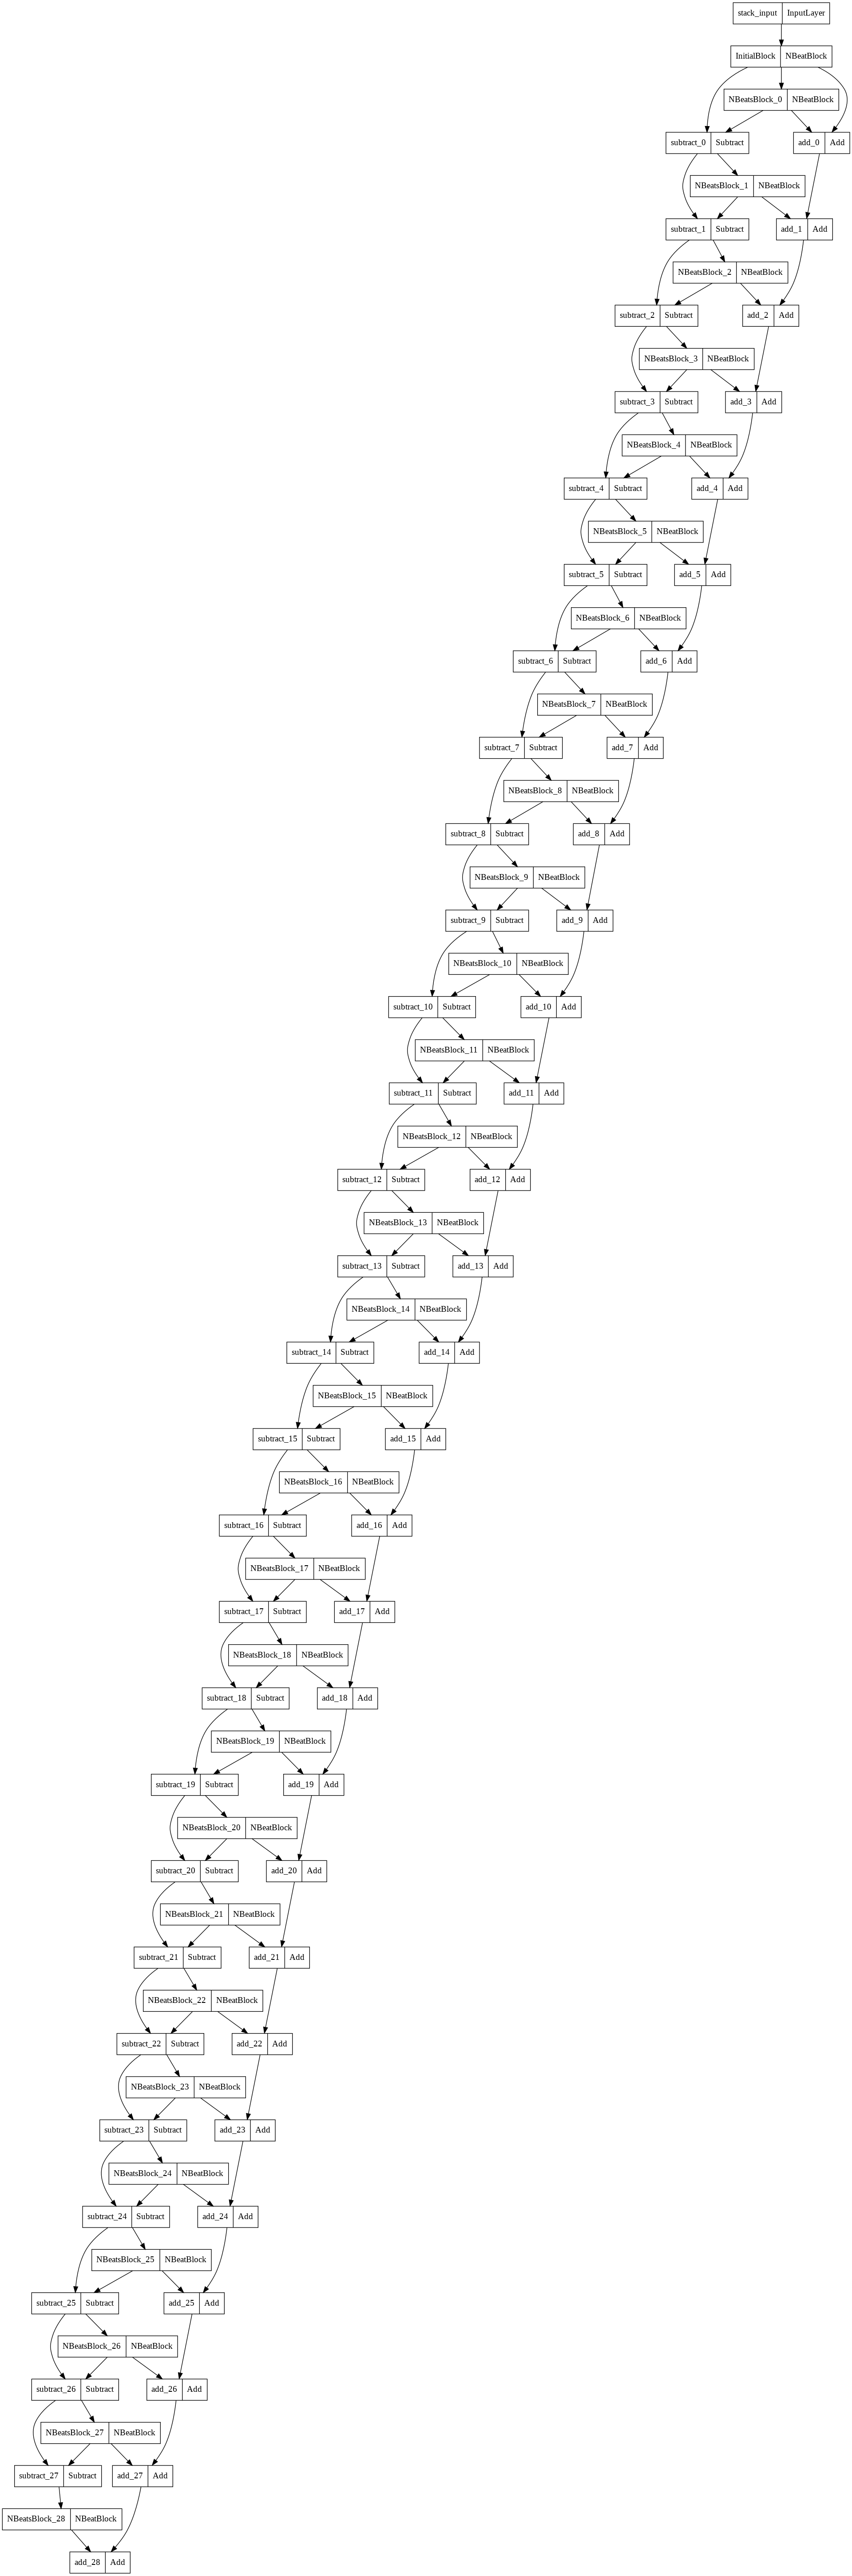

In [ ]:
#Plot the N-BEATS model and inspect the achitecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: creating an ensemble (multiple models stacked together)

an ensemble leerages the wisdom of the crowd effect

It combines many  different models to predict a common goal.

In [121]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting an ensemble model (using different loss functions)

In [141]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models


In [142]:
%%time 
#get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 669: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 769: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 583: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 683: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 173: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 634: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 740: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 840: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 692: ReduceLROnPl

In [144]:
len(ensemble_models)

15

In [145]:
!nvidia-smi

Tue Apr 19 05:17:03 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    73W / 149W |    409MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Make predictions with our ensemble model

In [146]:
# create a function which uses a list of trained models to mkaeand return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds=[]
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [147]:
#create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models = ensemble_models,
                                     data=test_dataset)
ensemble_preds

CPU times: user 822 ms, sys: 53.8 ms, total: 876 ms
Wall time: 828 ms


In [148]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8753.3  ,  8789.76 ,  9105.431, ..., 50278.74 , 48019.62 ,
        46340.293],
       [ 8771.11 ,  8783.363,  9015.794, ..., 49941.977, 48413.285,
        46052.035],
       [ 8816.862,  8793.228,  9059.752, ..., 50340.375, 48142.934,
        45809.39 ],
       ...,
       [ 8817.381,  8820.447,  9093.357, ..., 50665.094, 48462.848,
        45684.2  ],
       [ 8802.03 ,  8781.154,  9011.805, ..., 49759.535, 48381.492,
        46158.05 ],
       [ 8820.384,  8837.426,  9071.398, ..., 50043.215, 48987.137,
        46391.7  ]], dtype=float32)>

Our ensemble preds come out in multiple dimension but to combine into point predictions we can leverage the meanof all of the predictions oor the median: https://machinelearningmastery.com/combine-predictions-for-ensemble-learning/

In [149]:
ensemble_mean =tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8794.965, 8789.163, 9073.033, 8712.323, 8747.764, 8745.24 ,
       8654.98 , 8472.178, 8472.586, 8521.149], dtype=float32)>

In [150]:
ensemble_median=np.median(ensemble_preds, axis=0)
ensemble_median

array([ 8802.03  ,  8783.363 ,  9072.072 ,  8698.988 ,  8747.528 ,
        8749.226 ,  8655.114 ,  8471.413 ,  8465.584 ,  8521.008 ,
        8203.817 ,  8111.717 ,  8066.3223,  7630.276 ,  7311.1577,
        7331.5522,  7092.451 ,  7229.302 ,  7130.038 ,  7527.3477,
        7397.5576,  7747.4185,  7585.4946,  7400.6743,  7322.4844,
        7311.7036,  7189.356 ,  7389.1206,  7504.1543,  7546.1846,
        7566.5146,  7346.4775,  7239.0645,  7188.013 ,  7188.2793,
        7225.847 ,  7080.55  ,  7095.73  ,  6886.3955,  6594.41  ,
        7421.035 ,  7147.819 ,  7144.543 ,  7276.9004,  7276.6543,
        7186.4233,  7237.773 ,  7212.674 ,  7178.077 ,  7218.6875,
        7310.06  ,  7390.1094,  7258.299 ,  7178.645 ,  7168.6772,
        6949.506 ,  7275.846 ,  7328.372 ,  7359.8433,  7735.338 ,
        8094.624 ,  8147.814 ,  7874.9375,  8115.931 ,  8102.8555,
        8169.843 ,  8124.9204,  8758.074 ,  8911.6   ,  8764.914 ,
        8962.146 ,  9012.173 ,  8672.579 ,  8648.36  ,  8703.4

In [151]:
#evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 571.2382,
 'mape': 2.5751996,
 'mase': 0.6957999,
 'mse': 1155844.1,
 'rmse': 1075.1019}

In [152]:
#evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 568.4522,
 'mape': 2.5594933,
 'mase': 0.6950023,
 'mse': 1149801.0,
 'rmse': 1072.2877}